In [1]:
# Data first collected about 77.5 hours
# (already had 15 wins)

from fallGuysStructures import *
from fallGuysFcns import *
import fallGuysVisuals as fgv

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import os, datetime
import pandas as pd
import numpy as np

plt.rcParams['font.size'] = 14

shows_df, rounds_df, qual_df = getDataFrames()

finals_df = rounds_df[np.isin(rounds_df['Map'], list_of_finals)] # just finals
non_finals_df = rounds_df[~np.isin(rounds_df['Map'], list_of_finals)] # remove finals

get rid of personal in path


In [2]:
shows_df.tail()

,Show ID,Start Time,Season,Time Taken,Game Mode,Final,Rounds,Username,Party Size,addID,Kudos,Fame,Crowns
341,342,2021-03-07 10:50:17.684000,3,320.722,event_only_jump_club_0603_to_0803_2021,True,4,Infallible Laughing Penguin,1,16:55:38.406,265,0,0
342,343,2021-03-12 21:40:41.047000,3,348.623,event_only_floor_fall_1203_to_1403_2021,True,3,Infallible Laughing Penguin,1,03:46:29.670,180,0,0
343,344,2021-03-12 21:47:14.869000,3,370.807,event_only_floor_fall_1203_to_1403_2021,True,3,Infallible Laughing Penguin,1,03:53:25.676,180,0,0
344,345,2021-03-12 21:54:18.776000,3,187.787,event_only_floor_fall_1203_to_1403_2021,False,2,Infallible Laughing Penguin,1,03:57:26.563,85,0,0
345,346,2021-03-12 21:58:15.464000,3,378.807,event_only_floor_fall_1203_to_1403_2021,True,3,Infallible Laughing Penguin,1,04:04:34.271,915,0,1


In [3]:
rounds_df.tail(10)

,Show ID,Round Num,Map,Time Spent,Round Length,Qualified,Position,Kudos,Fame,Bonus Tier,Bonus Kudos,Bonus Fame,BadgeId,Participants,Qualification Percent,Actual Num Qual,Team Score
1222,343,1,round_floor_fall_event_only_02,71.691,71.697,True,4,20,0,0.0,35,0,gold,15,66,9.0,NaN
1223,343,2,round_floor_fall_event_only_final,121.269,uncertain,False,6,60,0,3.0,0,0,NaN,9,0,0.0,NaN
1224,344,0,round_floor_fall_event_only_01,32.671,32.675,True,5,30,0,0.0,35,0,gold,20,75,15.0,NaN
1225,344,1,round_floor_fall_event_only_02,66.305,66.307,True,8,20,0,0.0,35,0,gold,15,66,9.0,NaN
1226,344,2,round_floor_fall_event_only_final,111.860,uncertain,False,5,60,0,3.0,0,0,NaN,9,0,0.0,NaN
1227,345,0,round_floor_fall_event_only_01,45.173,45.176,True,12,30,0,0.0,35,0,gold,18,75,13.0,NaN
1228,345,1,round_floor_fall_event_only_02,65.436,uncertain,False,10,20,0,3.0,0,0,NaN,13,66,0.0,NaN
1229,346,0,round_floor_fall_event_only_01,45.169,45.176,True,1,30,0,0.0,35,0,gold,20,75,15.0,NaN
1230,346,1,round_floor_fall_event_only_02,69.235,69.239,True,3,20,0,0.0,35,0,gold,15,66,9.0,NaN
1231,346,2,round_floor_fall_event_only_final,118.919,118.921,True,1,760,0,0.0,35,0,gold,9,0,1.0,NaN


# Map Stats

In [4]:
# Get a DataFrame containing info for each different map
maps_df = getMapInfoDataFrame(rounds_df, qual_df)
maps_df.head(10)

,Name,Type,Attempts,Times Qualified,Percent Qualified,Average Position,Average Qual Position,Average Qual Time (s),Fastest Qual Time (s),Average Qual Round Times (s),Total Kudos,Total Fame,Average Kudos,Average Fame,Average Team Score,Bonus: Gold,Bonus: Silver,Bonus: Bronze,Average Tier
round_floor_fall_event_only_01,Hex-A-Gone 1 (Hex-a-gone Trials),Survival,73,68,93.150685,8.328767,7.632353,40.275882,14.903,40.278765,4570,1740,62.602740,23.835616,NaN,68,0,0,0.205479
round_floor_fall_event_only_02,Hex-A-Gone 2 (Hex-a-gone Trials),Survival,68,58,85.294118,5.617647,4.620690,64.181241,48.504,64.188086,3390,1276,49.852941,18.764706,NaN,58,0,0,0.441176
round_biggestfan,Big Fans,Race,60,60,100.000000,8.650000,8.650000,84.249717,55.290,177.517917,5135,2616,85.583333,43.600000,NaN,2,41,15,1.283333
round_floor_fall_event_only_final,Hex-A-Gone Final (Hex-a-gone Trials),Final,56,7,12.500000,4.232143,1.000000,129.596143,118.136,129.598429,8505,783,151.875000,13.982143,NaN,7,0,0,2.625000
round_jump_club_event_only_01,Jump Club 1 (Jump Around),Survival,50,47,94.000000,11.600000,10.680851,36.650574,26.872,36.668128,3145,474,62.900000,9.480000,NaN,47,0,0,0.180000
round_wall_guys,Wall Guys,Race,49,35,71.428571,9.591837,6.657143,78.899971,39.903,98.319486,4175,1712,85.204082,34.938776,NaN,2,10,17,2.122449
round_jump_club_event_only_02,Jump Club 2 (Jump Around),Survival,47,44,93.617021,10.659574,9.977273,33.680409,24.956,33.718886,2480,306,52.765957,6.510638,NaN,44,0,0,0.191489
round_jump_club_event_only_03,Jump Club 3 (Jump Around),Survival,44,37,84.090909,5.568182,4.162162,39.334973,28.399,39.326541,3935,266,89.431818,6.045455,NaN,37,0,0,0.477273
round_tunnel,Roll Out,Survival,39,32,82.051282,16.769231,13.312500,75.603000,22.657,75.612531,2140,1146,54.871795,29.384615,NaN,32,0,0,0.538462
round_dodge_fall,Fruit Chute,Race,38,30,78.947368,7.710526,6.033333,37.458133,30.552,45.967700,3535,1487,93.026316,39.131579,NaN,1,10,18,1.921053


# Round Stats

In [5]:
# Get a DataFrame containing info for each round number 
# (if a final occurs during round 5, that data is in 'final' and not '5')

# Give a switch to say if finals should be separate or not?
rounds_data_df = getRoundInfoDataFrame(rounds_df)
rounds_data_df

,Attempted,Qualified,Percent
Round Num,,,
1,346,332,95.953757
2,332,292,87.951807
3,231,182,78.787879
4,132,79,59.848485
5,4,1,25.000000
final,187,25,13.368984


# Show Stats

In [6]:
# Get a DataFrame containing info for shows by season and total

# add new things to 'getShowStats'
shows_info_df = getShowsInfoDataFrame(shows_df)
shows_info_df

,Total Shows,Total Wins,Total Finals,Average Time (s),Average Rounds,Average Kudos,Average Fame,% Made Finals,% Won,Total Time (hours),Minutes Per Win
2,117,8,47,598.054487,3.931624,360.811966,153.965812,40.170940,6.837607,19.436771,145.775781
3,229,18,143,417.011882,3.371179,290.895197,89.467249,62.445415,7.860262,26.526589,88.421964
total,346,26,190,478.231491,3.560694,314.537572,111.277457,54.913295,7.514451,45.963360,106.069292


# Playlist Stats

In [7]:
# Get a DataFrame containing info for shows by playlist and total
playlist_df = getPlaylistInfoDataFrame(shows_df)
playlist_df

C:\Users\Joseph\BreadTeleportationTechnology\DataScience\Fall Guys\fallGuysFcns.py:408: RuntimeWarning: divide by zero encountered in double_scalars
  'Minutes Per Win': shows_df['Time Taken'].sum() / 60 / shows_df['Crowns'].sum(),


,Total Shows,Total Wins,Total Finals,Average Time (s),Average Rounds,Average Kudos,Average Fame,% Made Finals,% Won,Total Time (hours),Minutes Per Win
main_show,185,17,81,585.468638,3.951351,374.000000,163.637838,43.783784,9.189189,30.086583,106.187939
event_only_hard_mode_2111_to_2711,2,0,0,325.063500,2.500000,132.500000,61.500000,0.000000,0.000000,0.180591,inf
event_season_3_highlight_1512_to_1912,9,0,5,571.339111,4.111111,305.555556,163.666667,55.555556,0.000000,1.428348,inf
event_only_floor_fall_0501_to_0701,37,1,32,340.677270,2.810811,184.054054,103.216216,86.486486,2.702703,3.501405,210.084317
event_fruit_basket_0801_to_1401,1,0,1,310.640000,3.000000,180.000000,106.000000,100.000000,0.000000,0.086289,inf
event_only_survival_2501_to_0102_2021,3,0,0,390.081333,2.666667,171.666667,104.666667,0.000000,0.000000,0.325068,inf
event_only_season_3_variation_0202_to_0702_2021,3,0,1,431.502000,3.333333,208.333333,118.333333,33.333333,0.000000,0.359585,inf
event_fan_favourites_0802_to_1102_2021,7,0,3,492.582571,3.285714,220.714286,121.857143,42.857143,0.000000,0.957799,inf
event_only_jump_club_1202_to_1402_2021,44,0,31,316.750114,3.500000,223.181818,26.954545,70.454545,0.000000,3.871390,inf
event_only_races_any_final_1502_to_1802_2021,1,0,0,593.942000,4.000000,265.000000,0.000000,0.000000,0.000000,0.164984,inf


# Other

In [8]:
# Get a DataFrame containing data for only final maps
maps_df[ maps_df['Type'] == 'Final' ]

,Name,Type,Attempts,Times Qualified,Percent Qualified,Average Position,Average Qual Position,Average Qual Time (s),Fastest Qual Time (s),Average Qual Round Times (s),Total Kudos,Total Fame,Average Kudos,Average Fame,Average Team Score,Bonus: Gold,Bonus: Silver,Bonus: Bronze,Average Tier
round_floor_fall_event_only_final,Hex-A-Gone Final (Hex-a-gone Trials),Final,56,7,12.500000,4.232143,1.0,129.596143,118.136,129.598429,8505,783,151.875000,13.982143,NaN,7,0,0,2.625000
round_jump_showdown_jump_club_event_only_final,Jump Showdown (Jump Around),Final,37,2,5.405405,5.189189,1.0,191.121000,139.286,191.123000,3320,140,89.729730,3.783784,NaN,2,0,0,2.837838
round_floor_fall,Hex-A-Gone,Final,27,2,7.407407,4.037037,1.0,106.807000,92.734,106.818000,3380,946,125.185185,35.037037,NaN,2,0,0,2.777778
round_fall_mountain_hub_complete,Fall Mountain,Final,21,7,33.333333,3.857143,1.0,38.216286,35.305,35.566286,6605,1885,314.523810,89.761905,NaN,7,0,0,2.000000
round_jump_showdown,Jump Showdown,Final,21,3,14.285714,5.428571,1.0,183.094333,142.522,183.097333,3625,1094,172.619048,52.095238,NaN,3,0,0,2.571429
round_thin_ice,Thin Ice,Final,13,3,23.076923,3.846154,1.0,131.022333,105.602,131.025000,3105,809,238.846154,62.230769,NaN,3,0,0,2.307692
round_tunnel_final,Roll Off,Final,9,0,0.000000,4.444444,NaN,NaN,NaN,NaN,630,270,70.000000,30.000000,NaN,0,0,0,3.000000
round_royal_rumble,Royal Fumble,Final,3,1,33.333333,3.333333,1.0,92.772000,92.772,90.400000,905,233,301.666667,77.666667,NaN,1,0,0,2.000000


In [9]:
# Get a Series containing number of times eliminated by map
rounds_df[rounds_df['Qualified'] == False]['Map'].value_counts()

round_floor_fall_event_only_final                 49
round_jump_showdown_jump_club_event_only_final    35
round_floor_fall                                  25
round_jump_showdown                               18
round_fall_mountain_hub_complete                  14
round_wall_guys                                   14
round_fall_ball_60_players                        10
round_floor_fall_event_only_02                    10
round_thin_ice                                    10
round_tunnel_final                                 9
round_dodge_fall                                   8
round_lava                                         8
round_tunnel                                       7
round_hoops_blockade_solo                          7
round_jump_club_event_only_03                      7
round_hoops                                        7
round_tail_tag                                     6
round_floor_fall_event_only_01                     5
round_match_fall                              

In [10]:
# Get a DataFrame containing the finals that were won
finals_df[finals_df['Qualified']]

,Show ID,Round Num,Map,Time Spent,Round Length,Qualified,Position,Kudos,Fame,Bonus Tier,Bonus Kudos,Bonus Fame,BadgeId,Participants,Qualification Percent,Actual Num Qual,Team Score
38,11,4,round_jump_showdown,181.522,181.524,True,1,770,210,0.0,35,18,gold,10,0,1.0,NaN
207,54,4,round_fall_mountain_hub_complete,39.191,36.421,True,1,770,210,0.0,35,18,gold,5,0,1.0,NaN
215,56,4,round_floor_fall,120.880,120.9,True,1,770,210,0.0,35,18,gold,12,0,1.0,NaN
293,75,4,round_jump_showdown,142.522,142.524,True,1,770,210,0.0,35,18,gold,8,0,1.0,NaN
298,76,4,round_fall_mountain_hub_complete,38.975,36.203,True,1,770,210,0.0,35,18,gold,9,0,1.0,NaN
317,82,4,round_fall_mountain_hub_complete,38.835,36.86,True,1,770,210,0.0,35,18,gold,9,0,1.0,NaN
356,91,4,round_fall_mountain_hub_complete,38.281,35.516,True,1,770,210,0.0,35,18,gold,10,0,1.0,NaN
416,106,4,round_fall_mountain_hub_complete,35.305,32.538,True,1,770,210,0.0,35,18,gold,10,0,1.0,NaN
503,128,4,round_jump_showdown,225.239,225.244,True,1,770,175,0.0,35,18,gold,13,0,1.0,NaN
534,135,4,round_fall_mountain_hub_complete,39.421,36.672,True,1,770,175,0.0,35,18,gold,12,0,1.0,NaN


# Visuals

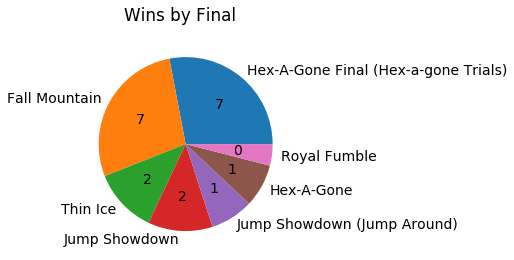

In [11]:
# Get a pie chart for final map wins
fgv.finalMapWinsPie(finals_df);

gold           1
silver        10
bronze        18
none           1
eliminated     8
Name: BadgeId, dtype: int64

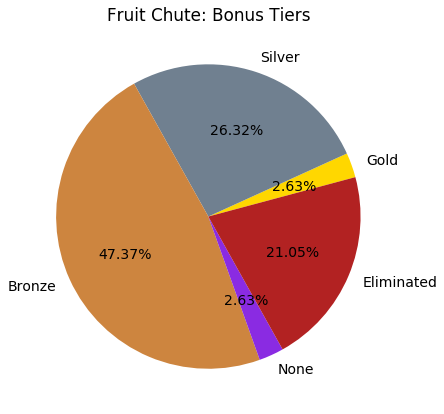

In [12]:
# Get a pie chart for a certain map - bonus tier
# can take either map names or their variables (round_dodge_fall)
fgv.mapBonusTiersPie(rounds_df, 'round_dodge_fall', eliminated=True, percent=True)

main_show                                  15
event_only_floor_fall_2302_to_2502_2021     5
event_only_jump_club_0603_to_0803_2021      2
event_only_floor_fall_1203_to_1403_2021     1
event_only_floor_fall_0501_to_0701          1
Name: Game Mode, dtype: int64

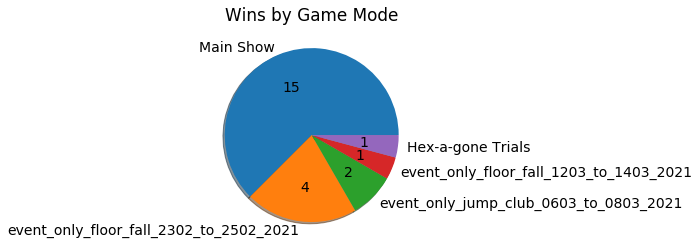

In [13]:
# Get a pie chart for wins by show
fgv.showWinsPie(shows_df)

In [14]:
# Get a Series containing times played each show
# extra for now
shows_df['Game Mode'].value_counts()

main_show                                          185
event_only_jump_club_1202_to_1402_2021              44
event_only_floor_fall_0501_to_0701                  37
event_only_floor_fall_2302_to_2502_2021             32
event_only_survival_1902_to_2202_2021               12
event_season_3_highlight_1512_to_1912                9
event_fan_favourites_0802_to_1102_2021               7
event_only_jump_club_0603_to_0803_2021               6
event_only_floor_fall_1203_to_1403_2021              4
event_only_survival_2501_to_0102_2021                3
event_only_season_3_variation_0202_to_0702_2021      3
event_only_hard_mode_2111_to_2711                    2
event_only_races_any_final_1502_to_1802_2021         1
event_fruit_basket_0801_to_1401                      1
Name: Game Mode, dtype: int64

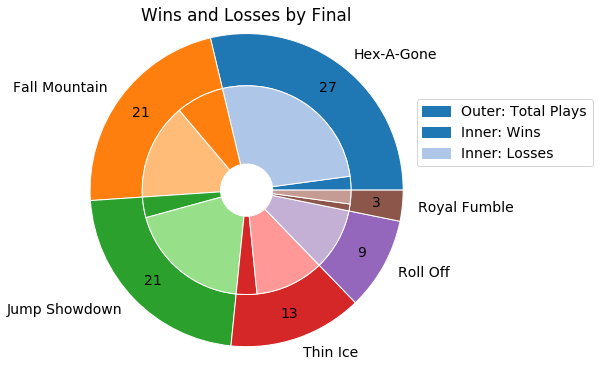

In [15]:
# Get a layered pie chart for plays vs wins and losses by final map
fgv.finalsWinsLossesPie(finals_df, regular=True, total_num=True); 

,overall,pos,neg
round_biggestfan,60,60,0
round_gauntlet_04,38,38,0
round_see_saw,37,37,0
round_gauntlet_01,32,30,2
round_chompchomp,25,24,1
round_gauntlet_02,25,24,1
round_gauntlet_05,23,23,0
round_door_dash,23,22,1
round_gauntlet_03,21,21,0


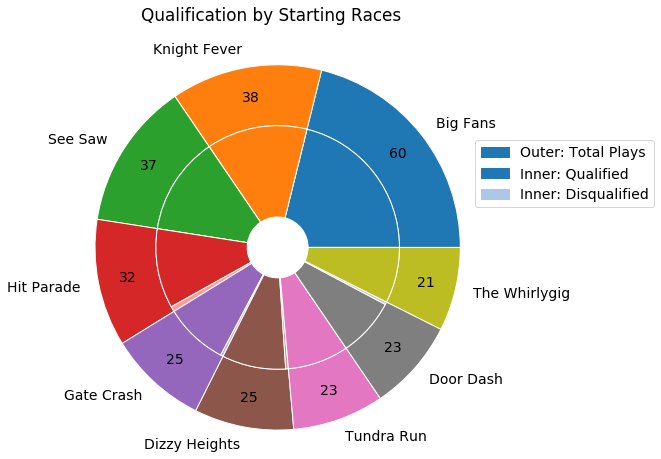

In [16]:
# Get a layered pie chart for qualfied vs non_qualified for starting races
fgv.startingRacesPie(rounds_df, total_num=True, pie_size=(7,7))

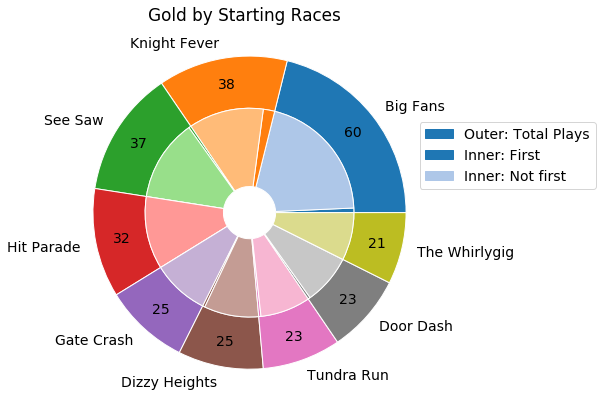

In [17]:
# Get a layered pie chart for gold vs non-gold for starting races
fgv.startingRacesPie(rounds_df, inner='gold', title='Gold by Starting Races', outer_title='Total Plays', 
                 inner_pos_title='First', inner_neg_title='Not first', total_num=True);

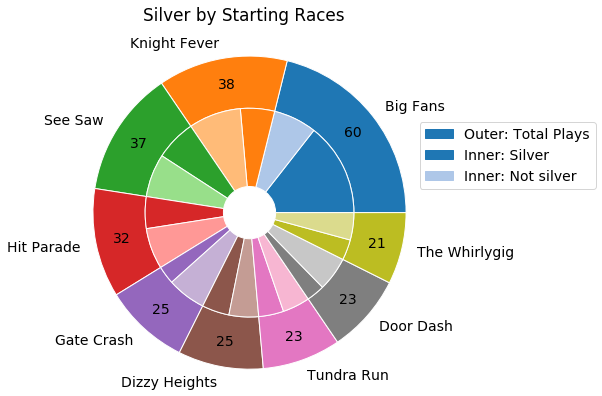

In [18]:
# Get a layered pie chart for silver vs non-silver for starting races
fgv.startingRacesPie(rounds_df, inner='silver', title='Silver by Starting Races', outer_title='Total Plays', 
                 inner_pos_title='Silver', inner_neg_title='Not silver', total_num=True);

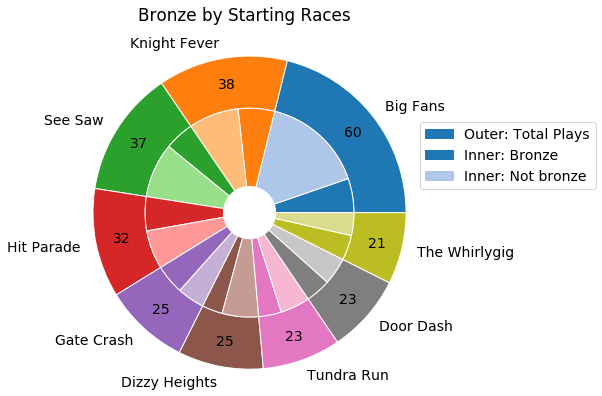

In [19]:
# Get a layered pie chart for bronze vs non-bronze for starting races
fgv.startingRacesPie(rounds_df, inner='bronze', title='Bronze by Starting Races', outer_title='Total Plays', 
                 inner_pos_title='Bronze', inner_neg_title='Not bronze', total_num=True);

In [20]:
# Just a notebook to display graphs
# can link to repo
# just add some text?

# Make a Fall Guys repo
# Put all this in it (/move it)
# Just have this notebook there as an example for now
#    - can worry about serving it later if opportunity arises (as something people can use)

# in repo
# zip w/ everything to get set up
# all files in a separate folder? 
# this notebook also in main